In [66]:
from importlib import reload
import os

import pandas as pd

import config as cf

In [67]:
reload(cf)

<module 'config' from '/opt/storage/projects/o/pp7_llm/pp7_llm_repo/src/config.py'>

In [68]:
# Load metadata
df = pd.read_csv(cf.metadata_file, sep="\t")

In [69]:
df.centuryBirth.value_counts()

centuryBirth
19    64
16    20
17     7
20     4
18     4
14     1
Name: count, dtype: int64

In [70]:
if False:
    df.centuryBirth.value_counts().plot(kind='pie', figsize=(10,5), labels=None, autopct="%.2f").legend(loc='upper left', labels=df.centuryBirth.value_counts().index, bbox_to_anchor=(1.25, 1))


In [71]:
if False:
    import seaborn as sns
    from matplotlib import pyplot as plt
    
    # Count the values in the 'centuryBirth' column
    century_counts = df['centuryBirth'].value_counts()
    
    # Create a DataFrame from the counts
    century_df = pd.DataFrame({'Century': century_counts.index, 'Count': century_counts.values})
    
    # Create the barplot
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Century', y='Count', data=century_df)
    plt.title('Number of Authors per Century')
    plt.show()

/tmp/ipykernel_8520/263271632.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


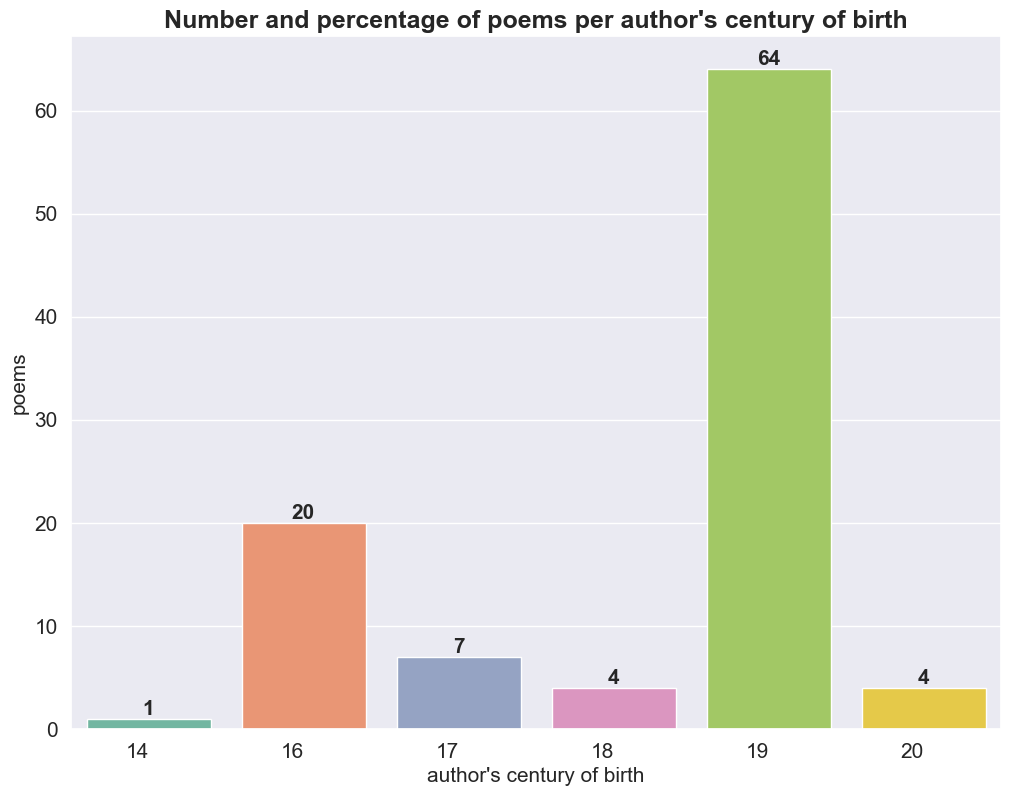

In [83]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()
plt.subplots(figsize=(12,9))
ax = sns.barplot(data=century_df, x='Century', y='Count', palette='Set2')
#for idx, val in century_df.iterrows():
#    ax.text(idx, century_df.iloc[idx]['Count']-1500, val['Count'], ha='center')
for ci in ax.containers:
    ax.bar_label(ci, fontsize=15, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right', fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_xlabel('author\'s century of birth', fontsize=15)
ax.set_ylabel('poems', fontsize=15)
_ = ax.set_title("Number and percentage of poems per author's century of birth",
       fontdict={'size': 18, 'weight': 'bold'})
plt.savefig(os.path.join(cf.plot_dir, "corpus_dist.pdf"), dpi=300)